In [ ]:
#!pip3 install tweepy

In [1]:
import tweepy as tw

In [2]:
import json, datetime, time

In [ ]:
bearer_token='XXXX'

In [ ]:
#!pip3 install tweepy
import tweepy as tw
import json, datetime, time
bearer_token='XXXXX'

class MyStreamingClient(tw.StreamingClient):
    '''def on_tweet(self, tweet):
        print(tweet.id)
        print(tweet.text)
        print('--------')      
client = MyStreamingClient(bearer_token)
rule_ids = []
if client.get_rules().data is not None:
    for rule in client.get_rules().data:
        rule_ids.append(rule.id)
        client.delete_rules(rule_ids)
        print('Rules are deleted')
client.add_rules(tw.StreamRule("Covid19"))
client.filter()'''
    def on_connect(self):
        print('Connection to Twitter API is successful.')
        self.tweet_count = 0 # initially tweet count is 0
    
    def on_tweet(self, tweet):
        self.tweet_count += 1 # every time there is a new tweet, count is increased by one
        print("Tweet count: ", self.tweet_count)
        tw_file = open('trudeau.json','a')
        tw_file.write( str(json.dumps(tweet.data))+'\n')
        tweet_number_limit = 1000
        if self.tweet_count >= tweet_number_limit:
            sys.exit(0)

client = MyStreamingClient(bearer_token)

rule_ids = []

if client.get_rules().data is not None:

    for rule in client.get_rules().data:
        rule_ids.append(rule.id)

        client.delete_rules(rule_ids)
        print('Rules are deleted')
        
client.add_rules(tw.StreamRule("Trudeau lang:en -is:retweet"))
client.filter()
        


In [6]:
#!pip install WordCloud

In [71]:
 #!pip install seaborn

In [9]:
from datetime import date
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy


C:\Users\ilkca\anaconda3\envs\Proje_1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
file_name = 'trudeau.json'

with open(file_name,'r') as file:
    lines = file.readlines()   


In [52]:
lines[0]

'{"edit_history_tweet_ids": ["1591120031672598531"], "id": "1591120031672598531", "text": "@SpeakerPelosi Make no mistake, nobody wants that. We want 2 dollar gas and 1.4% inflation."}\n'

In [53]:
text = str(lines)

In [54]:
score_list = []
for line in lines:
    
    tweet_dict = json.loads(line)
    tweet_text = tweet_dict['text']
    test_obj = TextBlob(tweet_text) # sentiment analysis with TextBlob
    tweet_score = test_obj.sentiment.polarity # sentiment analysis with TextBlob
    #print("Tweet text:",tweet_text )
    score_list.append(tweet_score)
    #print("Score",tweet_score )
    #print("---------")
    
scores = np.array(score_list)
#scores   

In [55]:
#!pip install WordCloud

In [56]:
#!pip install spacy

In [57]:
from datetime import date
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy


In [58]:
import scipy.integrate as integrate
import scipy


In [59]:
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(lines, columns=['Tweets'])

In [60]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('%','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = re.sub(r'[^\w\s]', '', text)
   # df['FSA'].str.replace('p', '')
    text = text.replace("edit_history_tweet_ids", " ")
    text = text.replace("id", '')
    text= text.replace("text", '')
    text = ''.join((x for x in text if not x.isdigit()))
   
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets


,Tweets,cleanedTweets
0,"{""edit_history_tweet_ids"": [""15911200316725985...",Make no mistake nobody wants that We wa...
1,"{""edit_history_tweet_ids"": [""15911200319619727...",US leadership restored on the world sta...
2,"{""edit_history_tweet_ids"": [""15911200338490368...",Is the clown emoji the extent of your p...
3,"{""edit_history_tweet_ids"": [""15911200336984268...",Youure obviously brainwa...
4,"{""edit_history_tweet_ids"": [""15911200325785600...",so then the border patrol is doing thei...


In [61]:
tweets_to_df['Tweets'][0]

'{"edit_history_tweet_ids": ["1591120031672598531"], "id": "1591120031672598531", "text": "@SpeakerPelosi Make no mistake, nobody wants that. We want 2 dollar gas and 1.4% inflation."}\n'

In [62]:
tweets_to_df['cleanedTweets'][0]

'       Make no mistake nobody wants that We want  dollar gas and  inflation '

In [48]:
tweets_to_df['cleanedTweets']

In [63]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

In [64]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,Make no mistake nobody wants that We wa...,0.10,0.200000
1,US leadership restored on the world sta...,0.60,-0.150000
2,Is the clown emoji the extent of your p...,0.55,-0.400000
3,Youure obviously brainwa...,0.80,-0.066667
4,so then the border patrol is doing thei...,0.90,0.600000


In [65]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [66]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Neutral     839
Positive    709
Negative    475
Name: Analysis, dtype: int64

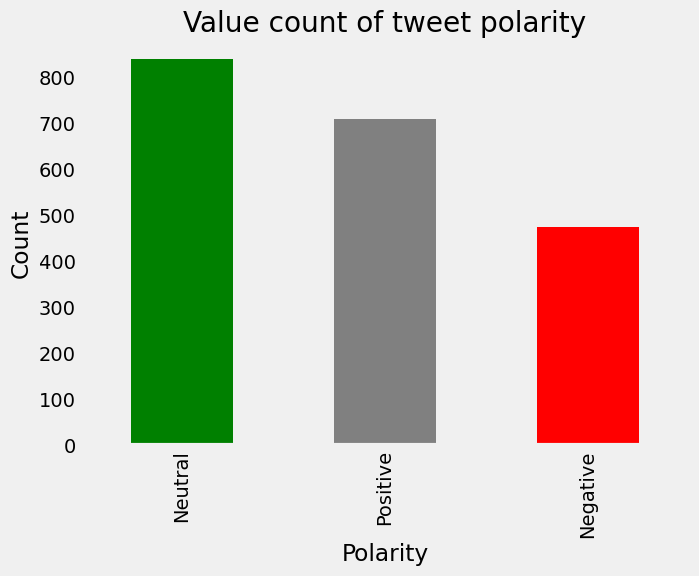

In [67]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

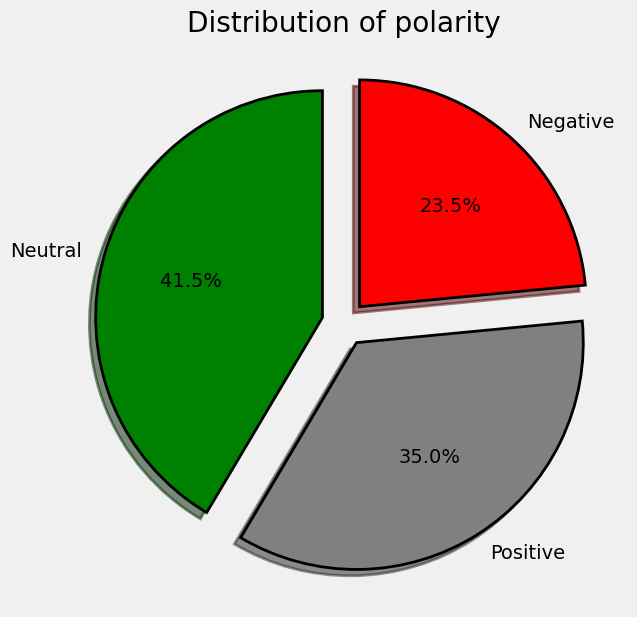

In [68]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

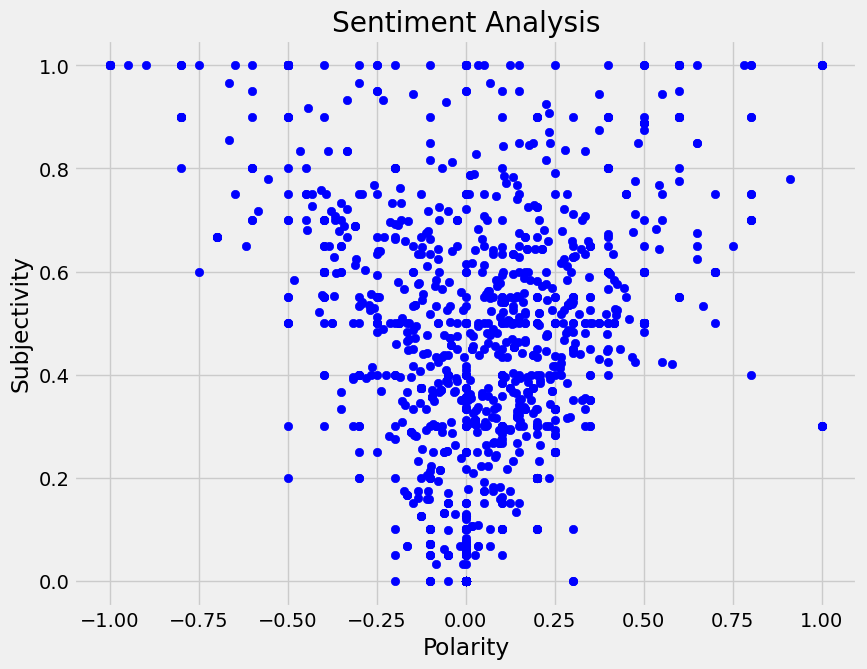

In [69]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

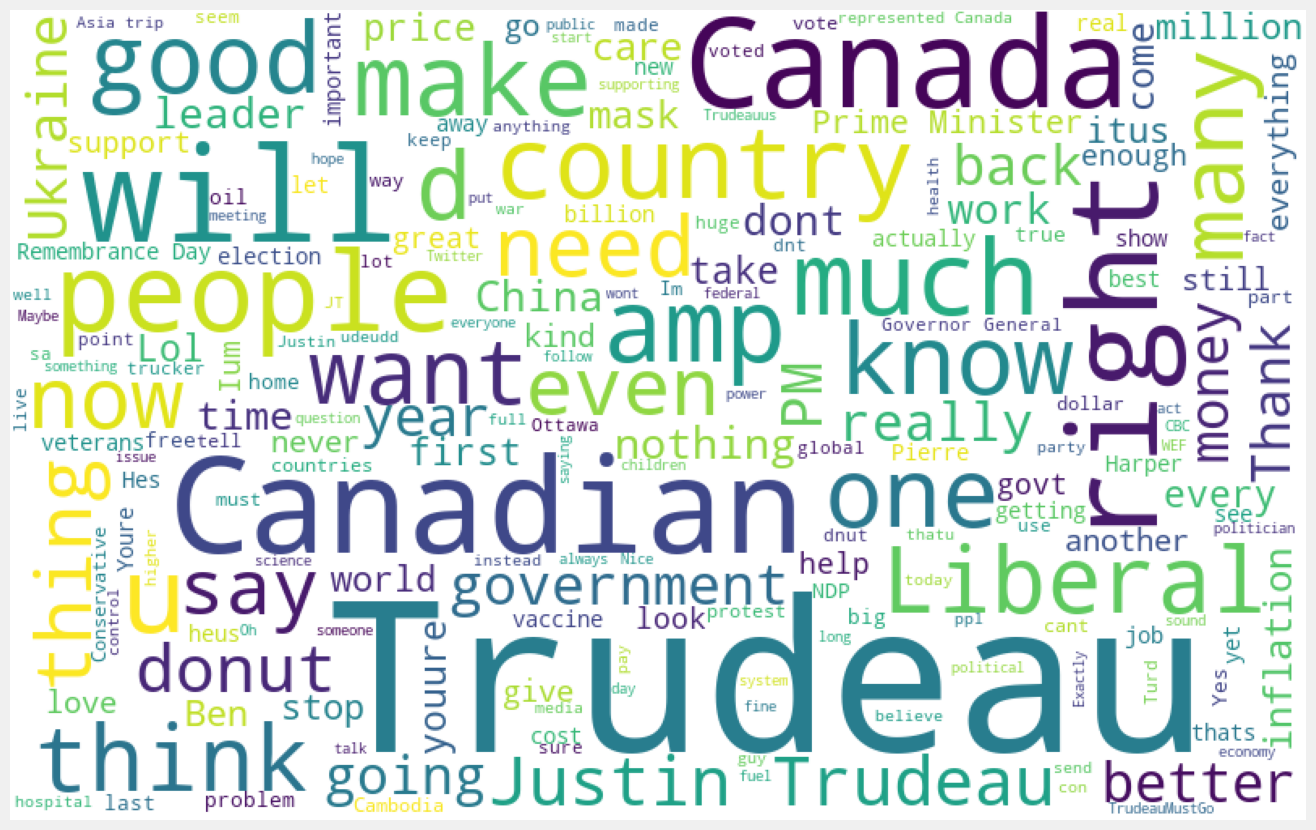

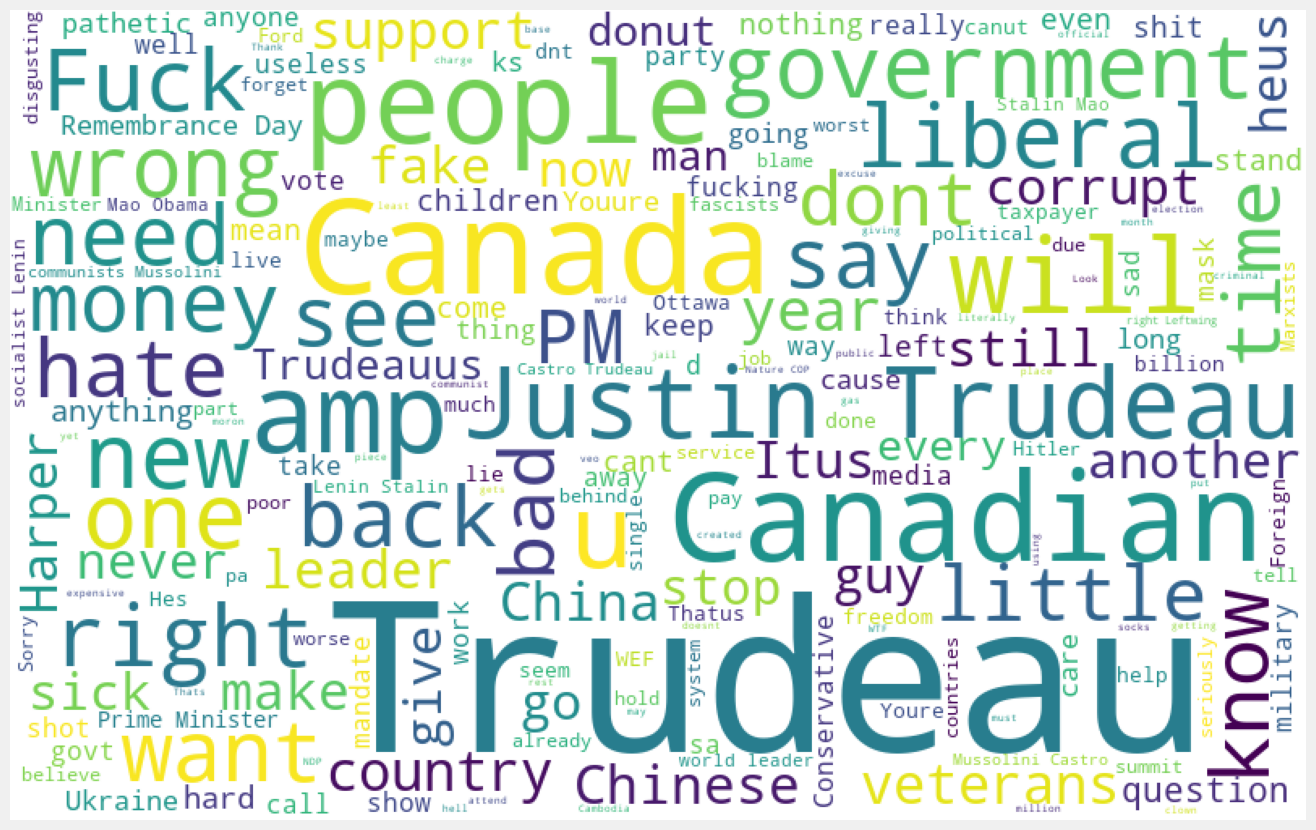

In [70]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)
